In [38]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from scipy import interp


In [40]:
# Read predictions data
data_fn = open('./roc_data_1.csv', 'r')
data_reader = csv.reader(data_fn)
y_true = []
y_score = []
for line in data_reader:
    y_true.append(int(line[0]))
    y_score.append(float(line[1]))
    
# Compute metrics
# ROC
fpr, tpr, thresholds = roc_curve(y_true, 1-np.array(y_score), pos_label=0)
_roc_auc_score = roc_auc_score(y_true, y_score)

# P-R
average_precision = average_precision_score(y_true, y_score)
precision, recall, _ = precision_recall_curve(y_true, y_score)


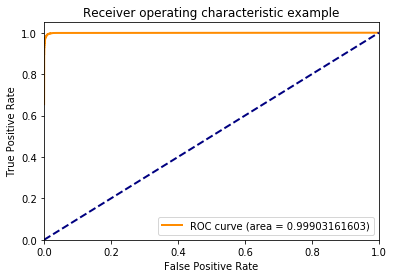

In [41]:
# Draw ROC Curve

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {})'.format(_roc_auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

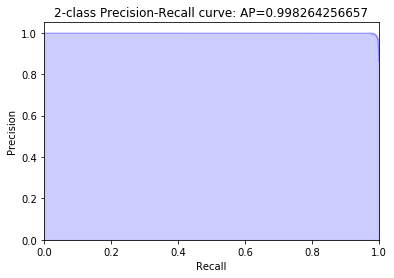

In [42]:
# Draw Precision-Recall-Curve

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={}'.format(average_precision))
plt.show()

['global_step', 'loss', 'accuracy']
['global_step', 'accuracy', 'precision', 'recall']
[1, 0.34375] [500, 0.985938]


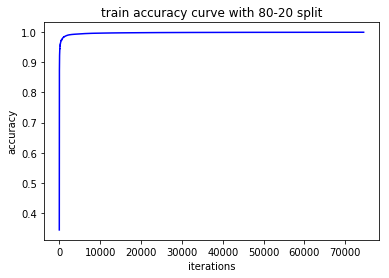

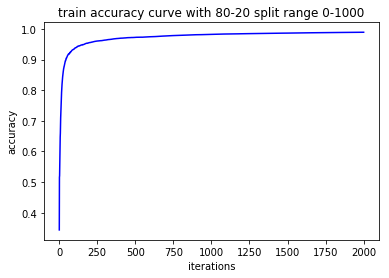

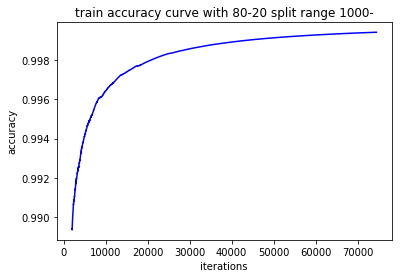

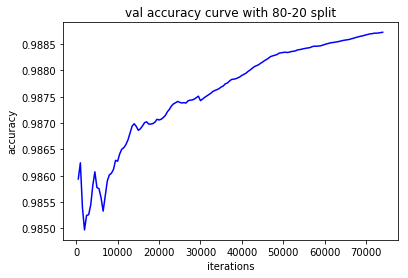

In [43]:
# Draw accuracy curve

train_fn = open('./train-dogncat.csv', 'r')
val_fn = open('./val-dogncat.csv', 'r')
csv_reader = csv.reader(train_fn)
train_data = []
for line in csv_reader:
    if csv_reader.line_num == 1:
        print line
        continue
    # train_data.append([int(line[0]), float(line[1]), float(line[2])])
    train_data.append([int(line[0]), float(line[2])])
train_fn.close()
csv_reader = csv.reader(val_fn)
val_data = []
for line in csv_reader:
    if csv_reader.line_num == 1:
        print line
        continue
    # val_data.append([int(line[0]), float(line[1]), float(line[2]), float(line[3])])
    val_data.append([int(line[0]), float(line[1])])
val_fn.close()

print train_data[0], val_data[0]

plt.figure()
plt.title('train accuracy curve with 80-20 split')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.plot(map(lambda x:x[0], train_data), map(lambda x:x[1], train_data), 'b', label='train')
plt.show()

break_point = 2000

plt.figure()
plt.title('train accuracy curve with 80-20 split range 0-1000')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.plot(map(lambda x:x[0], train_data[:break_point]), map(lambda x:x[1], train_data[:break_point]), 'b', label='train')
plt.show()

plt.figure()
plt.title('train accuracy curve with 80-20 split range 1000-')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.plot(map(lambda x:x[0], train_data[break_point:]), map(lambda x:x[1], train_data[break_point:]), 'b', label='train')
plt.show()

plt.figure()
plt.title('val accuracy curve with 80-20 split')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.plot(map(lambda x:x[0], val_data), map(lambda x:x[1], val_data), 'b', label='val')
plt.show()

In [64]:
# Draw accuracy curve for 10-fold cross validation

import os

fig = plt.figure()
plt.subplots_adjust(left=0.0, bottom=0.0, top=4, right=2)
plt.title('train accuracy curve 10-fold cross-validation')
for i in range(10):
    csv_fn = open(os.path.join('./10-fold-data/', 'train-fold-{}.csv'.format(i+1)), 'r')
    csv_reader = csv.reader(csv_fn)
    data = []
    for line in csv_reader:
        if csv_reader.line_num == 1:
            continue
        data.append([int(line[0]), float(line[2])])
    csv_fn.close()
    print('Train final Acc: Fold {} | Acc {}'.format(i+1, data[-1][1]))
    plt.subplot(4, 3, i+1)
    plt.title('fold {}'.format(i+1))
    plt.xlabel('iterations')
    plt.ylabel('accuracy')
    plt.plot(map(lambda x:x[0], data), map(lambda x:x[1], data), 'b', label='train')
# plt.show()
# fig.savefig('train_acc_curve_cross_validation.jpg', bbox_inches='tight')

fig = plt.figure()
plt.subplots_adjust(left=0.0, bottom=0.0, top=4, right=2)
plt.title('val accuracy curve 10-fold cross-validation')
for i in range(10):
    csv_fn = open(os.path.join('./10-fold-data/', 'val-fold-{}.csv'.format(i+1)), 'r')
    csv_reader = csv.reader(csv_fn)
    data = []
    for line in csv_reader:
        if csv_reader.line_num == 1:
            continue
        data.append([int(line[0]), float(line[1])])
    csv_fn.close()
    print('Val final Acc: Fold {} | Acc {}'.format(i+1, data[-1][1]))
    plt.subplot(4, 3, i+1)
    plt.title('fold {}'.format(i+1))
    plt.xlabel('iterations')
    plt.ylabel('accuracy')
    plt.plot(map(lambda x:x[0], data), map(lambda x:x[1], data), 'b', label='train')
# plt.show()
# fig.savefig('val_acc_curve_cross_validation.jpg', bbox_inches='tight')


Train final Acc: Fold 1 | Acc 0.996925
Train final Acc: Fold 2 | Acc 0.996778
Train final Acc: Fold 3 | Acc 0.996892
Train final Acc: Fold 4 | Acc 0.99725
Train final Acc: Fold 5 | Acc 0.996786
Train final Acc: Fold 6 | Acc 0.996869
Train final Acc: Fold 7 | Acc 0.997014
Train final Acc: Fold 8 | Acc 0.996956
Train final Acc: Fold 9 | Acc 0.996961
Train final Acc: Fold 10 | Acc 0.996658
Val final Acc: Fold 1 | Acc 0.988023
Val final Acc: Fold 2 | Acc 0.989409
Val final Acc: Fold 3 | Acc 0.985318
Val final Acc: Fold 4 | Acc 0.987432
Val final Acc: Fold 5 | Acc 0.987273
Val final Acc: Fold 6 | Acc 0.986932
Val final Acc: Fold 7 | Acc 0.986114
Val final Acc: Fold 8 | Acc 0.984068
Val final Acc: Fold 9 | Acc 0.985818
Val final Acc: Fold 10 | Acc 0.989432
